---
CSC 268 Lab 7:  Introduction to Edge Detection
---

This lab will introduce you to the basics of edge detection.  We will continue exploring this topic in the next homework assignment.

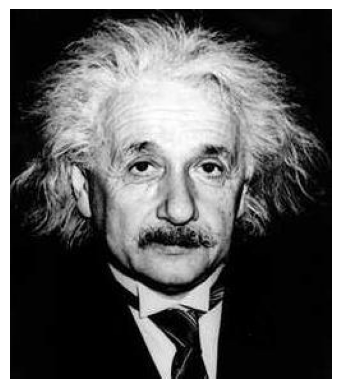

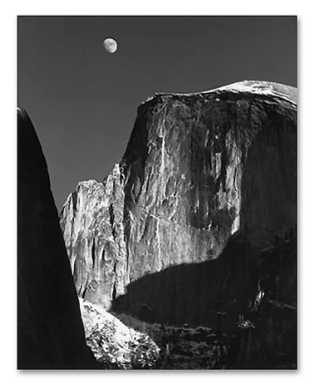

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')

def imshow(img,title=None):
    plt.imshow(img)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()
    
einstein = cv.imread('einstein.jpg',0).astype(np.float32)/255.0
halfdome = cv.imread('halfdome.jpg',0).astype(np.float32)/255.0
imshow(einstein)
imshow(halfdome)

### Part One:  Gradient Filters

Most basic edge detection algorithms begin with a gradient filter.  Actually, we need two filters, one for each component of the gradient.  (Typically one will be a 90-degree rotated version of the other.)  Common options are the Prewitt and Sobel filters, each of which computes the gradient components diretly.  The Roberts filters are less commonly used, probably because they compute components at a 45-degree rotation to the original axes, and require additional computation to align.

For this part of the lab, you should compute all three filter types for at least one of the sample images using OpenCV's `filter2D` function.  Display both components individually, and the gradient magnitude which you can compute using the Euclidean formula.  Can you see much difference between the options?

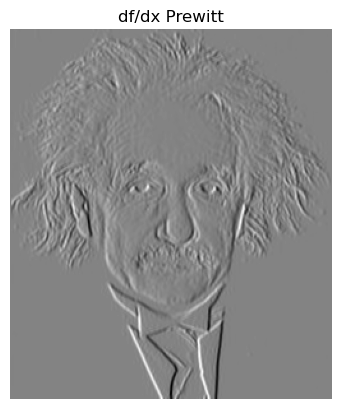

-2.6078434 2.4627452


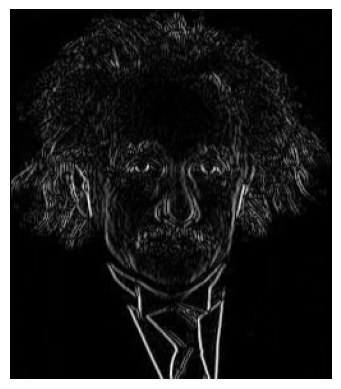

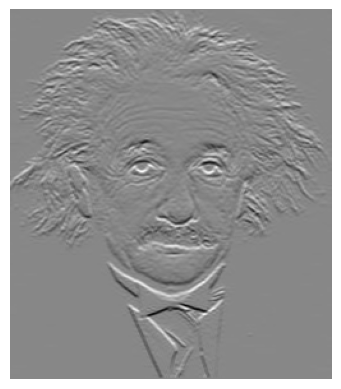

-2.5098038 2.2235293


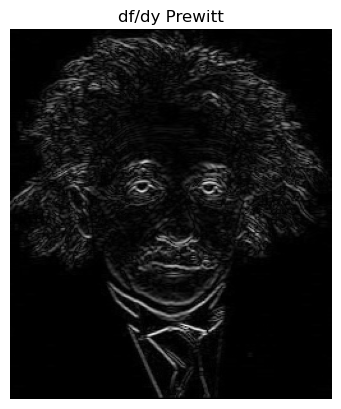

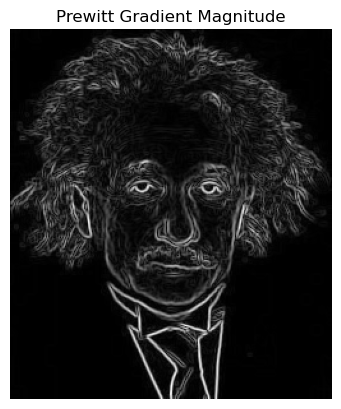

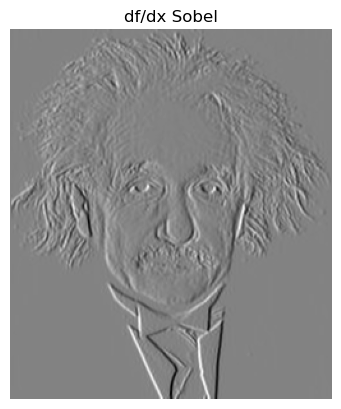

-3.4901962 3.3411765


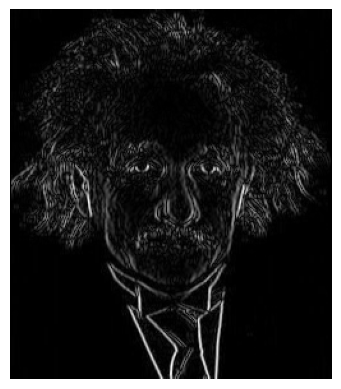

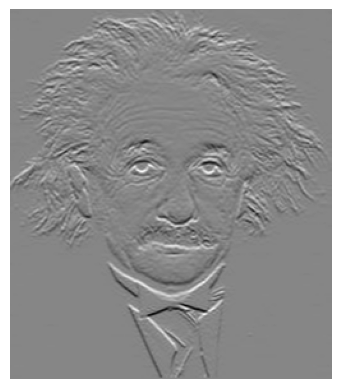

-3.3843136 3.0784314


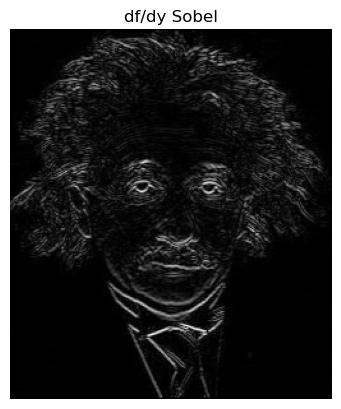

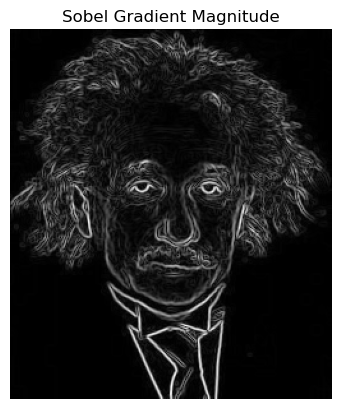

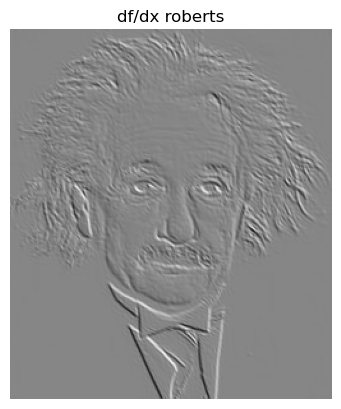

-1.6156863 1.4705882


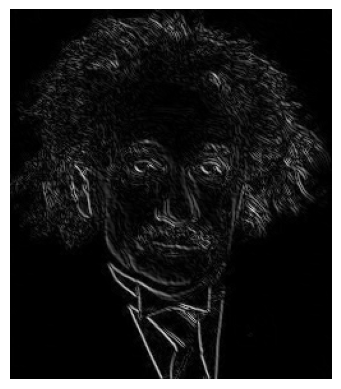

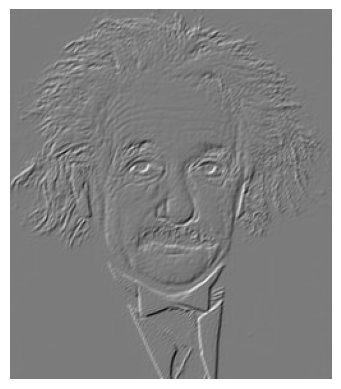

-1.3882353 1.4784315


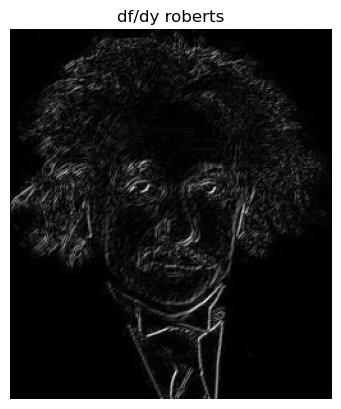

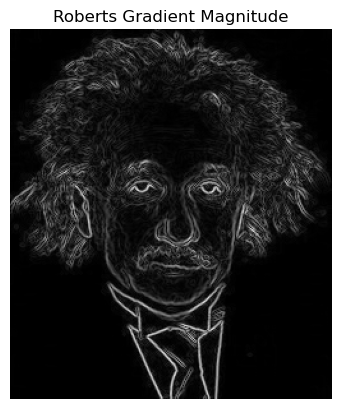

In [10]:
einstein_dfdx_prewitt = cv.filter2D(einstein,ddepth=-1,kernel=np.array([[-1,0,1],[-1,0,1],[-1,0,1]]))
imshow(einstein_dfdx_prewitt,'df/dx Prewitt')
print(einstein_dfdx_prewitt.min(), einstein_dfdx_prewitt.max())  # sign indicates direction of the gradient
imshow(np.abs(einstein_dfdx_prewitt))

# TODO: compute and display dfdx and dfdy for Prewitt, Sobel, and Roberts filters.  
# Also compute and display the gradient magnitude for each filter type.  What differences do you see (if any)?
einstein_dfdy_prewitt = cv.filter2D(einstein,ddepth=-1,kernel=np.array([[-1,-1,-1],[0,0,0],[1,1,1]]))
imshow(einstein_dfdy_prewitt)
print(einstein_dfdy_prewitt.min(), einstein_dfdy_prewitt.max())  # sign indicates direction of the gradient
imshow(np.abs(einstein_dfdy_prewitt),'df/dy Prewitt')
imshow(np.sqrt(einstein_dfdx_prewitt**2+einstein_dfdy_prewitt**2),'Prewitt Gradient Magnitude')

einstein_dfdx_sobel = cv.filter2D(einstein,ddepth=-1,kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]]))
imshow(einstein_dfdx_sobel,'df/dx Sobel')
print(einstein_dfdx_sobel.min(), einstein_dfdx_sobel.max())  # sign indicates direction of the gradient
imshow(np.abs(einstein_dfdx_sobel))
einstein_dfdy_sobel = cv.filter2D(einstein,ddepth=-1,kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]]))
imshow(einstein_dfdy_sobel)
print(einstein_dfdy_sobel.min(), einstein_dfdy_sobel.max())  # sign indicates direction of the gradient
imshow(np.abs(einstein_dfdy_sobel),'df/dy Sobel')
imshow(np.sqrt(einstein_dfdx_sobel**2+einstein_dfdy_sobel**2),'Sobel Gradient Magnitude')

einstein_dfdx_roberts = cv.filter2D(einstein,ddepth=-1,kernel=np.array([[0,-1,0],[1,0,-1],[0,1,0]]))
imshow(einstein_dfdx_roberts,'df/dx roberts')
print(einstein_dfdx_roberts.min(), einstein_dfdx_roberts.max())  # sign indicates direction of the gradient
imshow(np.abs(einstein_dfdx_roberts))
einstein_dfdy_roberts = cv.filter2D(einstein,ddepth=-1,kernel=np.array([[0,-1,0],[-1,0,1],[0,1,0]]))
imshow(einstein_dfdy_roberts)
print(einstein_dfdy_roberts.min(), einstein_dfdy_roberts.max())  # sign indicates direction of the gradient
imshow(np.abs(einstein_dfdy_roberts),'df/dy roberts')
imshow(np.sqrt(einstein_dfdx_roberts**2+einstein_dfdy_roberts**2),'Roberts Gradient Magnitude')

### Part Two:  Thresholding

Using the gradient magnitude results from above, try to find a threshold value that produces a nice looking edge image.  "Nice" in this case means that it includes all the edges you want to include, and none of the edges you don't want.  How easy is this to do?

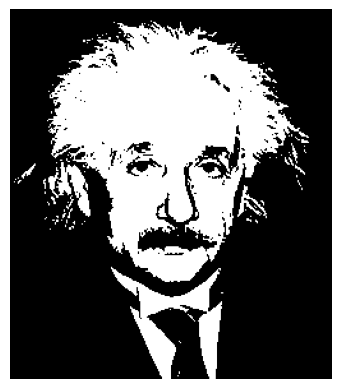

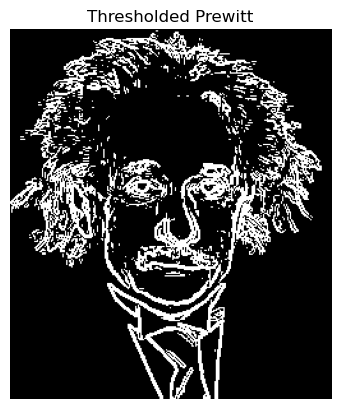

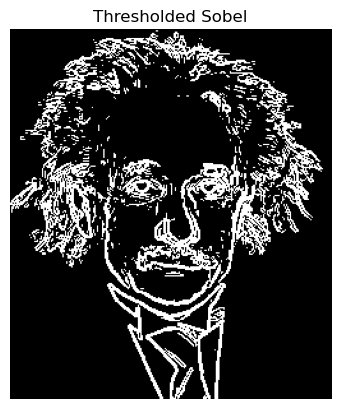

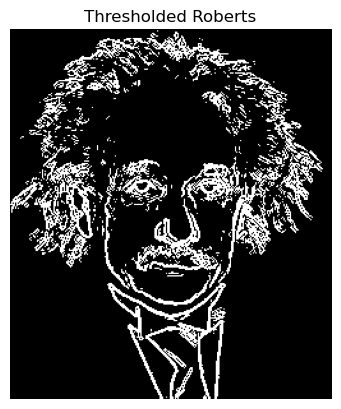

In [17]:
# As an example, we threshold and display the original image.
imshow(einstein>0.5)

# TODO:  Display a thresholded version of each type of edge image.
imshow(einstein_dfdx_prewitt**2+einstein_dfdy_prewitt**2 > .2,'Thresholded Prewitt')
imshow(einstein_dfdx_sobel**2+einstein_dfdy_sobel**2 > .4,'Thresholded Sobel')
imshow(einstein_dfdx_roberts**2+einstein_dfdy_roberts**2 > .08,'Thresholded Roberts')